In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from matplotlib import style
from plotnine.data import mpg
from plotnine import ggplot, aes, geom_point
import geopandas as gpd
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
import matplotlib.colors
import plotly.express as px
from plotly.subplots import make_subplots


In [162]:
df1 = pd.read_csv('skiresort_EU.csv', index_col = 'Unnamed: 0')
df1.head()


,Resort Name,Continent,Country,State/Province,Ski Resort Rate,Altitude,Easy,Intermediate,Difficult,Kms,...,On-site parking,Trail maps and signs,Cleanliness and hygiene,Environmentally friendly ski operation,Restaurants and Gastronomy,Apres-ski,Families and children,Beginners,Snow parks,Cross-Country
0,KitzSki – Kitzbühel/Kirchberg,Europe,Austria,Tyrol (Tirol),4.9,2000.0,101.0,61.0,17.0,179.0,...,4.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0
1,Ischgl/Samnaun – Silvretta Arena,Europe,Austria,Tyrol (Tirol),4.8,2872.0,47.0,142.0,49.0,238.0,...,4.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,4.0
2,SkiWelt Wilder Kaiser-Brixental,Europe,Austria,Tyrol (Tirol),4.8,1957.0,122.0,129.0,33.0,284.0,...,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0
3,St. Anton/St. Christoph/Stuben/Lech/Zürs/Warth...,Europe,Austria,Tyrol (Tirol),4.8,2811.0,132.0,123.0,50.0,305.0,...,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,4.0
4,Serfaus-Fiss-Ladis,Europe,Austria,Tyrol (Tirol),4.8,2820.0,47.0,123.0,28.0,198.0,...,4.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,5.0,4.0


In [163]:
df2 = pd.read_csv('skiresort_A.csv', index_col = 'Unnamed: 0')
df2.head()

,Resort Name,Continent,Country,State/Province,Ski Resort Rate,Altitude,Easy,Intermediate,Difficult,Kms,...,On-site parking,Trail maps and signs,Cleanliness and hygiene,Environmentally friendly ski operation,Restaurants and Gastronomy,Apres-ski,Families and children,Beginners,Snow parks,Cross-Country
0,Whistler Blackcomb,North America,Canada,British Columbia,4.7,2284.0,40.0,110.0,50.0,200.0,...,3.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,3.0
1,Vail,North America,USA,Colorado,4.6,3433.0,57.0,84.0,93.0,234.0,...,4.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,5.0,3.0
2,Telluride,North America,USA,Colorado,4.5,3815.0,6.7,51.7,29.8,88.2,...,3.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0
3,Beaver Creek,North America,USA,Colorado,4.5,3488.0,28.5,64.5,57.0,150.0,...,4.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,5.0,3.0
4,Mammoth Mountain,North America,USA,California,4.4,3369.0,18.4,48.5,22.9,89.8,...,4.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,3.0


In [164]:
ski_resorts= pd.concat([df1,df2] ,axis=0, ignore_index=True)
#ski_resorts.to_csv('skiAmEU.csv')
ski_resorts.head()

,Resort Name,Continent,Country,State/Province,Ski Resort Rate,Altitude,Easy,Intermediate,Difficult,Kms,...,On-site parking,Trail maps and signs,Cleanliness and hygiene,Environmentally friendly ski operation,Restaurants and Gastronomy,Apres-ski,Families and children,Beginners,Snow parks,Cross-Country
0,KitzSki – Kitzbühel/Kirchberg,Europe,Austria,Tyrol (Tirol),4.9,2000.0,101.0,61.0,17.0,179.0,...,4.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0
1,Ischgl/Samnaun – Silvretta Arena,Europe,Austria,Tyrol (Tirol),4.8,2872.0,47.0,142.0,49.0,238.0,...,4.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,4.0
2,SkiWelt Wilder Kaiser-Brixental,Europe,Austria,Tyrol (Tirol),4.8,1957.0,122.0,129.0,33.0,284.0,...,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0
3,St. Anton/St. Christoph/Stuben/Lech/Zürs/Warth...,Europe,Austria,Tyrol (Tirol),4.8,2811.0,132.0,123.0,50.0,305.0,...,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,4.0
4,Serfaus-Fiss-Ladis,Europe,Austria,Tyrol (Tirol),4.8,2820.0,47.0,123.0,28.0,198.0,...,4.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,5.0,4.0


In [165]:
#Number of Resort by country 
resort_bycountry = ski_resorts.groupby(['Continent','Country'],as_index=False)[['Resort Name']].count().sort_values(by='Resort Name', ascending=False)
resort_bycountry = resort_bycountry.rename(columns = {'Resort Name':'Count'})

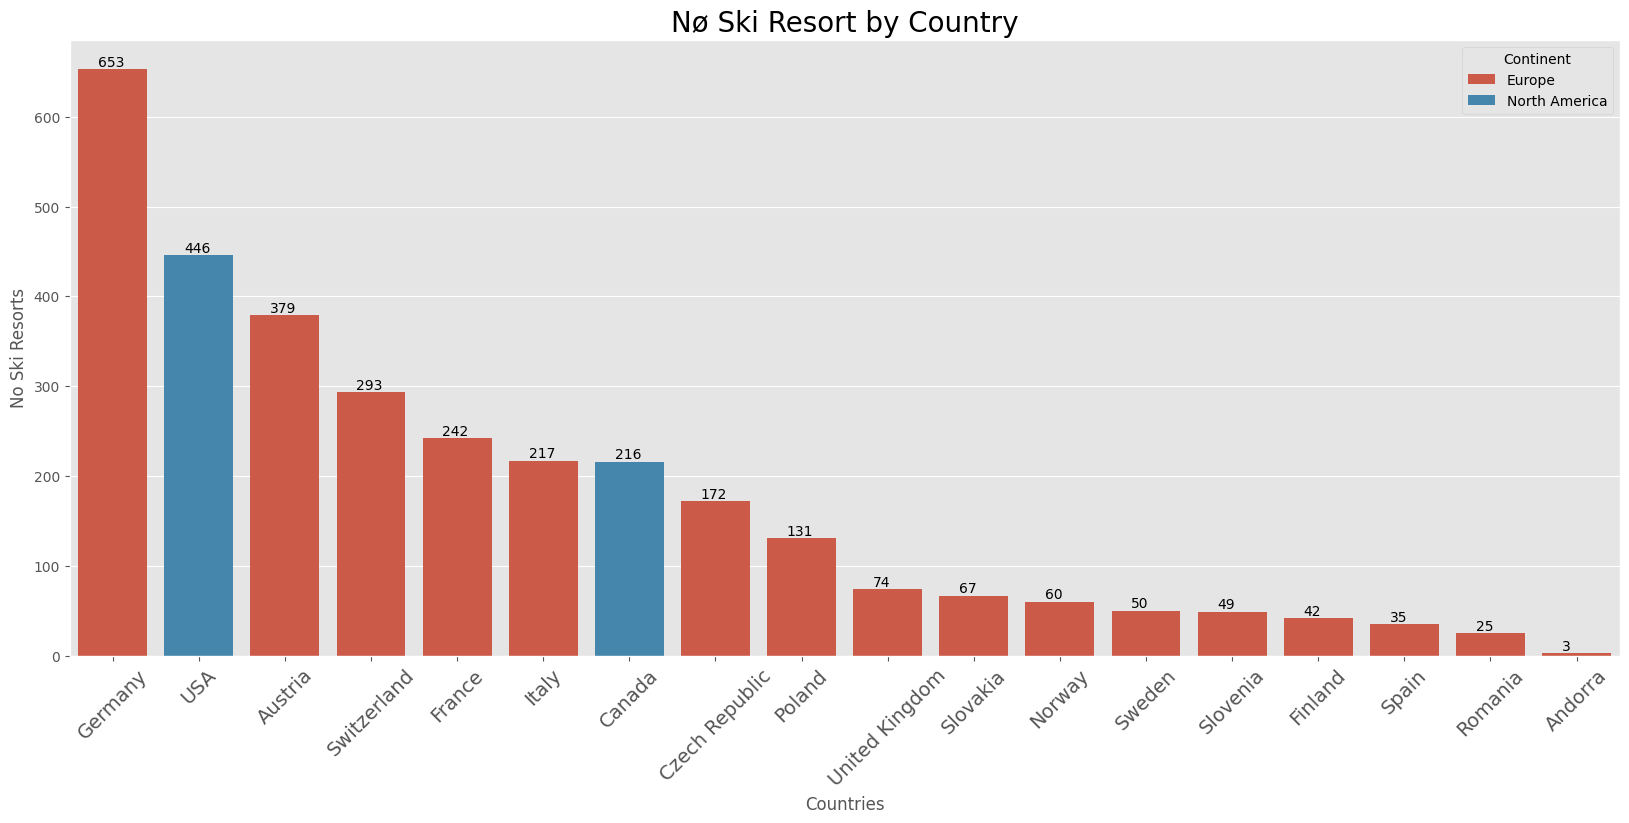

In [166]:
#Show the number of ski resort there are in each Country
style.use('ggplot')
plt.figure(figsize=(20,8))
barplot=sns.barplot(x=resort_bycountry['Country'],
            y=resort_bycountry['Count'],
           errorbar=None,hue= resort_bycountry['Continent'], width=0.8, dodge=False);

for bar in barplot.patches:
    # print(bar.get_height())
    altura_b = bar.get_height()
    # print(bar.get_x())
    x_b = bar.get_x()
    # print(bar.get_width())
    w_b = bar.get_width()
    if not pd.isna(altura_b):
        plt.text(x_b + w_b/3.5 , altura_b, int(altura_b), va="bottom")

barplot.set(xlabel='Countries', ylabel='No Ski Resorts');
plt.title('Nø Ski Resort by Country', fontsize = 20)
plt.xticks(rotation =45, fontsize = 14);

In [167]:
#Kms slopes by country 
Kms = ski_resorts.groupby('Country')[['Easy','Intermediate ','Difficult']].sum()
Kms['Total'] =  Kms.apply(lambda row:row.sum(),axis=1)
Kms

,Easy,Intermediate,Difficult,Total
Country,,,,
Andorra,144.0,115.0,44.0,303.0
Austria,2826.9,3438.9,827.7,7093.5
Canada,958.8,1531.1,1268.4,3758.3
Czech Republic,260.6,205.3,35.3,501.2
Finland,123.1,105.5,33.6,262.2
France,4530.1,3552.3,1118.8,9201.2
Germany,656.9,490.9,130.9,1278.7
Italy,1707.3,2541.3,751.7,5000.3
Norway,497.0,262.8,133.8,893.6


In [168]:
Kms['Intermediate '].values

array([ 115. , 3438.9, 1531.1,  205.3,  105.5, 3552.3,  490.9, 2541.3,
        262.8,  123.5,   60. ,  153. ,  122.6,  473.5,  251.1, 3145.5,
       4665.5,   52. ])

In [423]:
import plotly.express as px

fig = make_subplots(rows=2, cols=2, specs=[[{'type':'pie'}, {'type':'pie'}],[{'type':'pie'},{'type':'pie'}]],subplot_titles=['Green slopes', 'Blue Slopes','Black Slopes','Total'])

fig.add_trace(go.Pie(labels = Kms.index, values=Kms.Easy.values, ),1,1)
fig.update_traces(textposition='inside', textinfo='percent+label',insidetextorientation='radial',pull=[0, 0, 0, 0,0,0,0.2,0,0,0,0,0,0])

fig.add_trace(go.Pie(labels = Kms.index, values=Kms['Intermediate '].values),1,2)
fig.update_traces(textposition='inside', textinfo='percent+label',insidetextorientation='radial',pull=[0, 0, 0, 0,0,0,0.2,0,0,0,0,0,0])

fig.add_trace(go.Pie(labels = Kms.index, values=Kms['Difficult'].values),2,1)
fig.update_traces(textposition='inside', textinfo='percent+label',insidetextorientation='radial',pull=[0, 0, 0, 0,0,0,0.2,0,0,0,0,0,0])

fig.add_trace(go.Pie(labels = Kms.index, values=Kms['Total'].values),2,2)
fig.update_traces(textposition='inside', textinfo='percent+label',insidetextorientation='radial',pull=[0, 0, 0, 0,0,0,0.2,0,0,0,0,0,0])

fig.update_layout(title_text='Kms by Countries', width=900,height=900)

fig.show()

    ## we see the different of density seeing diferente level split by Continent

In [170]:
dificulties  = ski_resorts.groupby(['Resort Name','Continent'])[['Easy','Intermediate ','Difficult']].sum()
dificulties.reset_index(inplace=True)


In [171]:
dificulties_melt = dificulties.melt(id_vars='Continent', value_vars=['Easy', 'Intermediate ', 'Difficult'], var_name = 'dificulties', value_name = 'kms')
dificulties_melt

,Continent,dificulties,kms
0,Europe,Easy,17.3
1,Europe,Easy,42.0
2,Europe,Easy,2.8
3,Europe,Easy,60.0
4,Europe,Easy,30.6
...,...,...,...
9457,Europe,Difficult,0.0
9458,Europe,Difficult,1.2
9459,Europe,Difficult,0.0
9460,Europe,Difficult,1.0


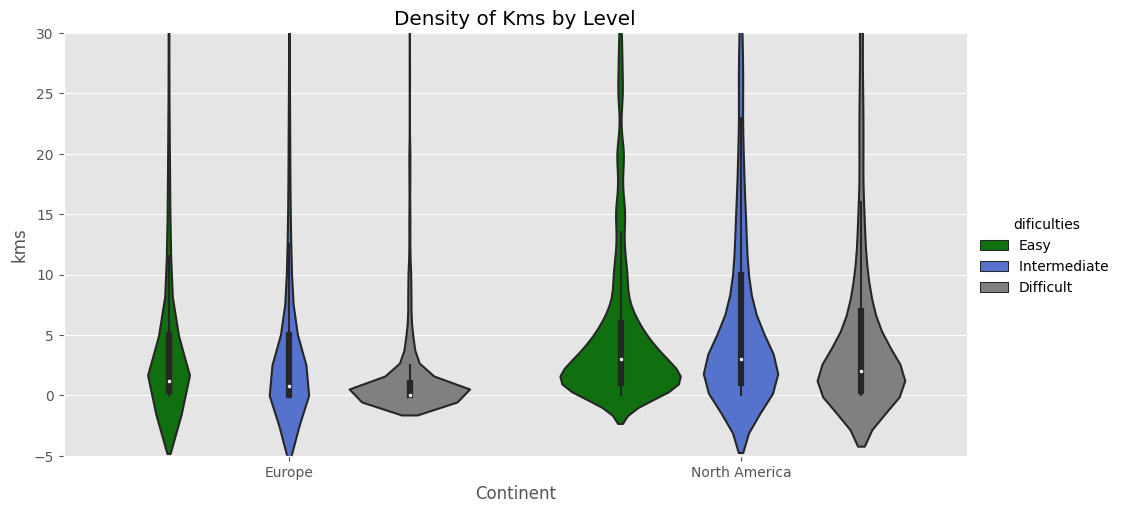

In [172]:
my_pal = ['Green','RoyalBlue','grey' ]

sns.catplot(x="Continent",
            y="kms",
            hue="dificulties",
            kind= 'violin',
            data=dificulties_melt,
            height=5,
            aspect=2, bw= .15, palette= my_pal );
            
plt.title('Density of Kms by Level')

plt.ylim(-5,30);

        ##hacer grafico de barras por cada continnent y a suvez por las diferentes levels

In [ ]:
# Distribution of Freeride slopes 

## Prices 

In [173]:
#See outliers in price by different countries, mean of the prices, how the distribution of the price going on
price = ski_resorts.groupby(['Resort Name','Country'])[['Adult']].mean().sort_values('Adult',ascending=False)
price.reset_index(inplace=True)

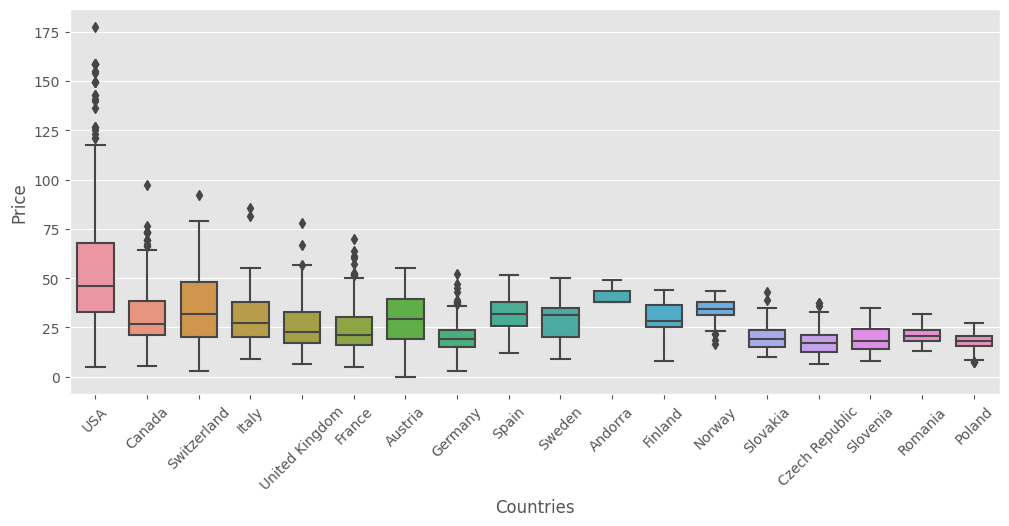

In [174]:
plt.figure(figsize= (12,5))
sns.boxplot(x='Country' ,y= 'Adult', data= price,dodge=False,width=0.7)
plt.xticks(rotation = 45)
plt.ylabel('Price')
plt.xlabel('Countries');

In [350]:
#Correlations between diferent variables of ski resorts.
corre = ski_resorts[['Continent','Ski Resort Rate', 'Ski resort size', 'Kms', 'Easy','Intermediate ', 'Adult','Slope offering','Snow reliability','Snow parks','Freeride','Families and children','Restaurants and Gastronomy']].corr()

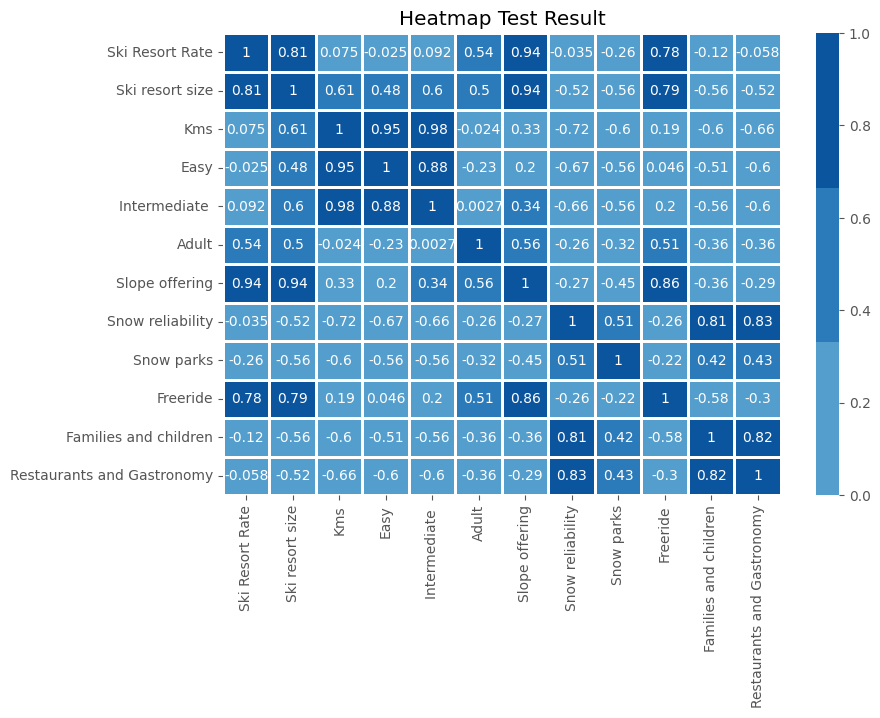

In [352]:

plt.figure(figsize=(9,6))
mask = np.zeros_like(corre)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corre.corr(),vmin=0, vmax=1, center=0,
            cmap= sns.color_palette("Blues"), linewidths=.9, annot=True);

plt.title('Heatmap Test Result')
plt.show()


    ##pairplot between these variables, that I thought They are very important between themselves

In [355]:
df1 = ski_resorts[['Continent','Ski Resort Rate', 'Ski resort size', 'Kms', 'Intermediate ', 'Adult']]
df2 = ski_resorts[['Continent','Slope offering','Snow reliability','Snow parks','Freeride']]
df3 = ski_resorts[['Continent','Families and children','Restaurants and Gastronomy']]
df4 = ski_resorts[['Continent','Ski Resort Rate', 'Ski resort size','Slope offering','Freeride']]
df5 = ski_resorts[['Continent','Ski Resort Rate','Apres-ski','Snow parks','Environmentally friendly ski operation']]

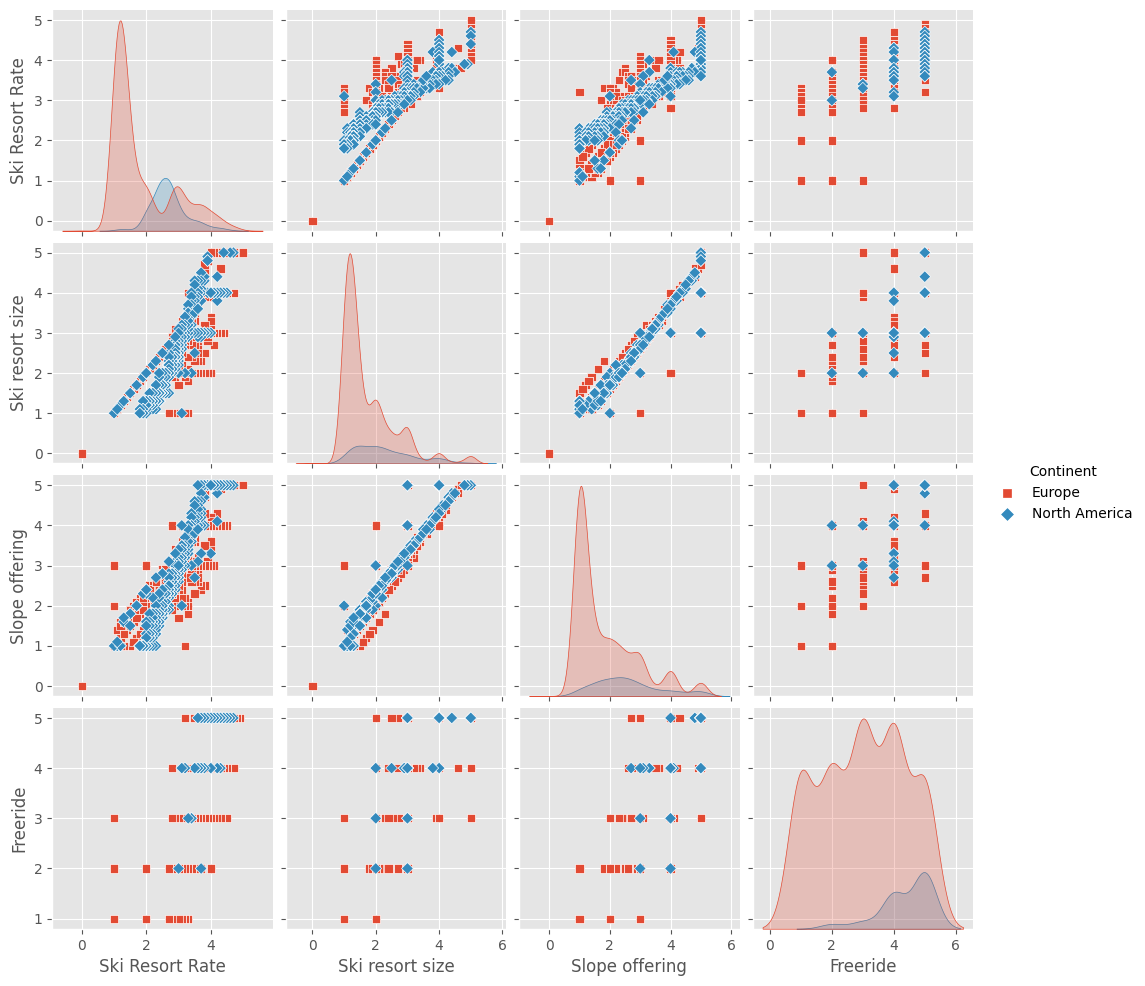

In [356]:
sns.pairplot(df4, hue = 'Continent',markers=["s", "D"]);

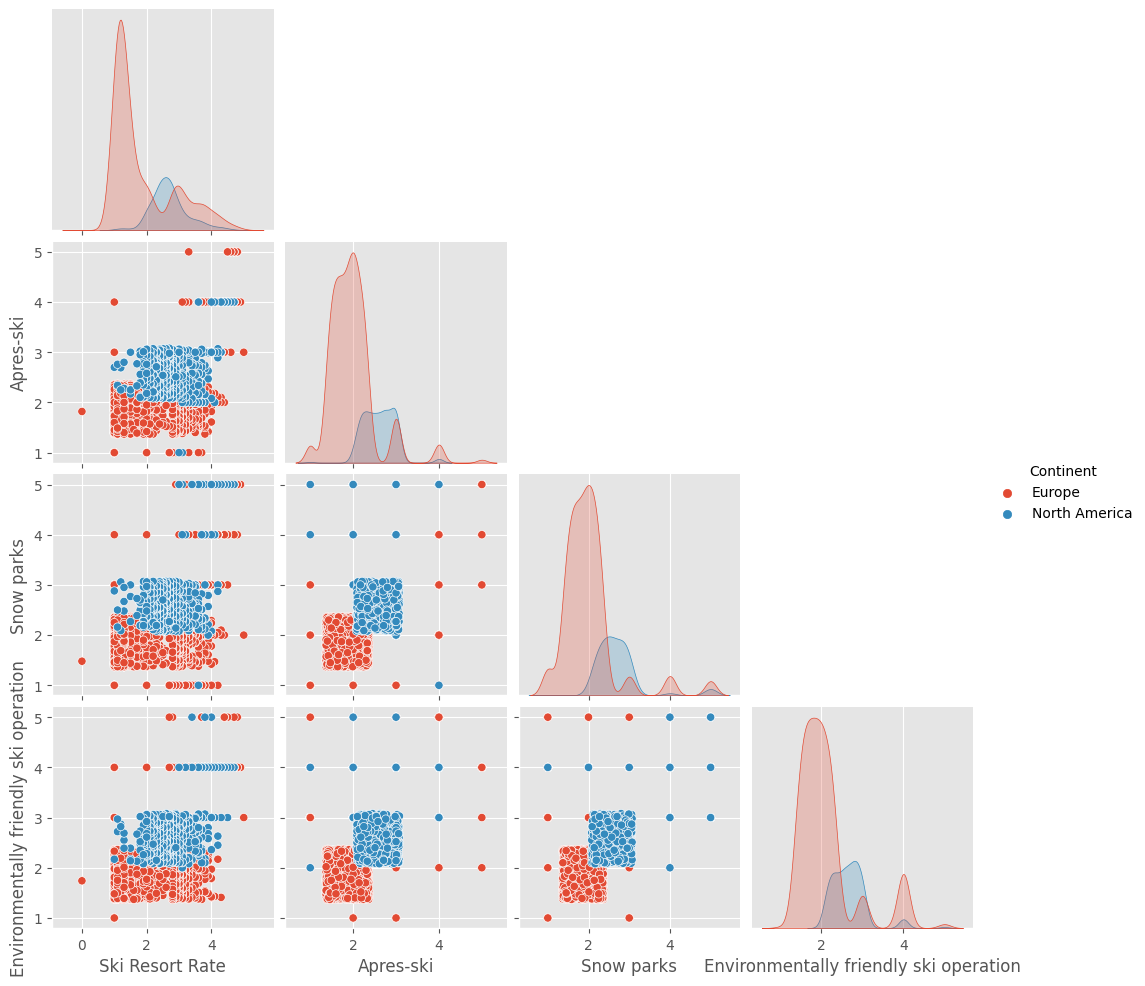

In [180]:
sns.pairplot(df5, corner=True, hue = 'Continent');

In [424]:
top = ski_resorts[ski_resorts['Country'].isin(['Italy','USA','France','Austria','Switzerland'])]

In [427]:
top = top.groupby(['Resort Name','Country'])['Freeride','Ski Resort Rate'].sum().sort_values('Ski Resort Rate', ascending=False)

top.reset_index(inplace=True)


/Users/migueldefrutos/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [428]:

fig = px.box(top, y= 'Ski Resort Rate', color="Country",facet_col="Country",
             boxmode="overlay", points='all',color_discrete_sequence=px.colors.diverging.Earth)
fig.update_traces(marker=dict(size=3))
fig.update_layout(plot_bgcolor='azure',paper_bgcolor='azure', title = 'Top Rates')

fig.show()


        ##WE see the distribution Freeride Kms Beetween diferent countries

In [396]:
freeride = ski_resorts.groupby(['Resort Name','Country','Continent'])[['Freeride Kms']].sum()
freeride.reset_index(inplace =True)

In [410]:
NA = freeride[freeride['Continent'].isin(['North America',])]
EU = freeride[freeride['Continent'].isin(['Europe'])]
EU

,Resort Name,Country,Continent,Freeride Kms
0,3 Zinnen Dolomites – Helm/Stiergarten/Rotwand...,Italy,Europe,0.0
1,Aletsch Arena – Riederalp/Bettmeralp/Fiesch E...,Switzerland,Europe,15.0
2,Ankogel – Mallnitz,Austria,Europe,0.0
3,Auron (Saint-Etienne-de-Tinée),France,Europe,0.0
4,Bad Gastein/Bad Hofgastein – Schlossalm/Anger...,Austria,Europe,1.3
...,...,...,...,...
3149,zugerberg,Switzerland,Europe,0.0
3150,zum-zeri-passo-dei-due-santi,Italy,Europe,0.0
3151,zvicina,Czech Republic,Europe,0.0
3152,zwoelferhorn-st-gilgen,Austria,Europe,0.0


In [417]:

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'pie'}]],subplot_titles=['Europe', 'North America'])

fig.add_trace(go.Pie(labels = EU['Country'], values=EU['Freeride Kms']),1,1)
fig.update_traces(textposition='inside', textinfo='percent+label',insidetextorientation='radial',pull=[0.2, 0, 0, 0,0,0,0,0,0,0,0,0,0])

fig.add_trace(go.Pie(labels = NA['Country'], values=NA['Freeride Kms']),1,2)
fig.update_traces(textposition='inside', textinfo='percent+label',insidetextorientation='radial',pull=[0, 0.2])

fig.update_layout(title_text='Freeride Kms',)



In [421]:
TOP = freeride[freeride['Country'].isin(['Austria','USA'])]
TOP

,Resort Name,Country,Continent,Freeride Kms
2,Ankogel – Mallnitz,Austria,Europe,0.0
4,Bad Gastein/Bad Hofgastein – Schlossalm/Anger...,Austria,Europe,1.3
5,Bad Kleinkirchheim,Austria,Europe,5.0
11,Bolton Valley,USA,North America,0.0
15,Buttermilk Mountain,USA,North America,0.0
...,...,...,...,...
3133,zellenberg-kukmirn,Austria,Europe,0.0
3134,zenitzen-winklern,Austria,Europe,0.0
3139,zinkenlifte-duerrnberg-hallein,Austria,Europe,0.0
3140,zlaim-grundlsee,Austria,Europe,0.0


In [422]:
fig = go.Figure()
fig = px.sunburst(TOP, path=['Country', 'Resort Name'], values='Freeride Kms')
fig.show()